# Electric Car Data

In this project, I will be analysing the real-world [One Electric Vehicle Dataset ](https://www.kaggle.com/geoffnel/evs-one-electric-vehicle-dataset) from Kaggle. 


Datasource: [EV Dataset](https://ev-database.org/#sort:path~type~order=.rank~number~desc|range-slider-range:prev~next=0~1200|range-slider-acceleration:prev~next=2~23|range-slider-topspeed:prev~next=110~450|range-slider-battery:prev~next=10~200|range-slider-eff:prev~next=100~300|range-slider-fastcharge:prev~next=0~1500|paging:currentPage=0|paging:number=9) 



In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
EV = pd.read_csv("ElectricCarData_Clean.csv")

**Looking at the structure of the dataset using .info and .head methods**

In [5]:
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [6]:
EV.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


# Data Cleaning and Transformation

Look for any null values.

In [7]:
EV.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [8]:
len(EV['Brand'])

103

In [9]:
Brand2 = []
for i in EV['Brand']:
    #print(len(i))
    Brand2.append(i.strip())
   # print(len(i.strip())
EV['Brand'] = Brand2

**Let's create a new column combining the Brand and Model**

In [10]:
EV['FullName'] = EV['Brand'] + '-' + EV['Model']
EV.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FullName
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,Tesla-Model 3 Long Range Dual Motor
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,Volkswagen-ID.3 Pure
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,Polestar-2
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,BMW-iX3
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,Honda-e


Note that the FastCharge column is of type 'object'.

**Check for non-numeric values in the FastCharge_KmH column**
**Convert FastCharge column into a numeric column. Forcing all non-numeric values to NaN**

We assume that no Fast Charge values mean those vehicles do not offer the opportunity for fast charging

In [11]:
EV['FastCharge_KmH']=pd.to_numeric(EV['FastCharge_KmH'],errors = 'coerce')
EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   98 non-null     float64
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  FullName         103 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 12.2+ KB


In [12]:
EV['FastCharge_KmH'].isnull().sum()    #number of NaN in the converted column

5

5 vehicle with non-numeric values for FastCharge_KmH identified

**Display the complete dataset for the vehicles that do not offer Fast Charging**

In [13]:
EV[EV['FastCharge_KmH'].isnull()]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FullName
57,Renault,Twingo ZE,12.6,135,130,164,NaN,No,RWD,Type 2,Hatchback,A,4,24790,Renault-Twingo ZE
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,NaN,No,FWD,Type 2,SPV,N,5,38000,Renault-Kangoo Maxi ZE 33
77,Smart,EQ forfour,12.7,130,95,176,NaN,No,RWD,Type 2,Hatchback,A,4,22030,Smart-EQ forfour
82,Smart,EQ fortwo coupe,11.6,130,100,167,NaN,No,RWD,Type 2,Hatchback,A,2,21387,Smart-EQ fortwo coupe
91,Smart,EQ fortwo cabrio,11.9,130,95,176,NaN,No,RWD,Type 2,Cabrio,A,2,24565,Smart-EQ fortwo cabrio


**Let's create a sub dataset without these 5 records, we will retain the original complete dataframe as 'EV'**

In [14]:
EV1 = EV[~EV['FastCharge_KmH'].isna()]
EV1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            98 non-null     object 
 1   Model            98 non-null     object 
 2   AccelSec         98 non-null     float64
 3   TopSpeed_KmH     98 non-null     int64  
 4   Range_Km         98 non-null     int64  
 5   Efficiency_WhKm  98 non-null     int64  
 6   FastCharge_KmH   98 non-null     float64
 7   RapidCharge      98 non-null     object 
 8   PowerTrain       98 non-null     object 
 9   PlugType         98 non-null     object 
 10  BodyStyle        98 non-null     object 
 11  Segment          98 non-null     object 
 12  Seats            98 non-null     int64  
 13  PriceEuro        98 non-null     int64  
 14  FullName         98 non-null     object 
dtypes: float64(2), int64(5), object(8)
memory usage: 12.2+ KB



**Can we estimate the Battery Capacity of each vehicle?**

We can try using the rated Range(km) and rated Efficiency(Wh/km) to estimate the battery capacity:

        Estimated Battery Capacity (kWh) = Efficiency(kWh/km) * Range(km)

In [15]:
EV['BatteryCapacity_kWh']=EV['Efficiency_WhKm']*EV['Range_Km']/1000
EV.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FullName,BatteryCapacity_kWh
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,Tesla-Model 3 Long Range Dual Motor,72.45
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,Volkswagen-ID.3 Pure,45.09
2,Polestar,2,4.7,210,400,181,620.0,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,Polestar-2,72.40
3,BMW,iX3,6.8,180,360,206,560.0,Yes,RWD,Type 2 CCS,SUV,D,5,68040,BMW-iX3,74.16
4,Honda,e,9.5,145,170,168,190.0,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,Honda-e,28.56


## EDA

Conducting some exploratory data analysis.


Text(0.5, 0, 'Number of Models')

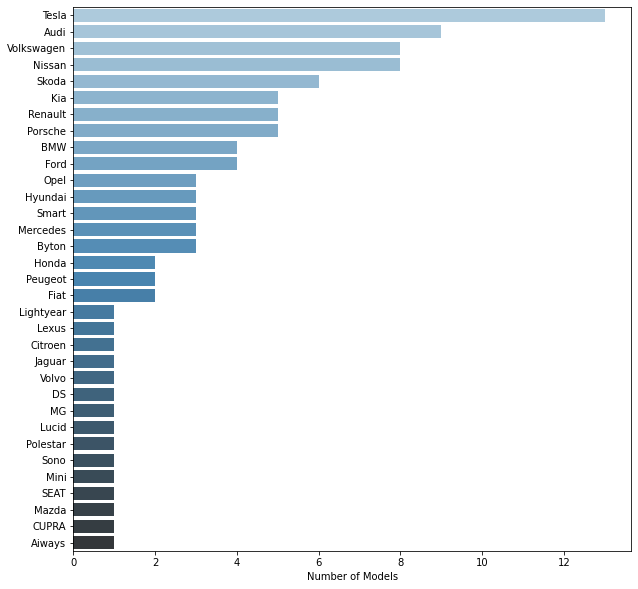

In [16]:
br= EV['Brand'].value_counts()

plt.figure(figsize=(10,10))
plt.xlabel("Number of Models")
sns.barplot(y=br.index, x=br,
           palette="Blues_d",
           orient= "h")
plt.xlabel("Number of Models")

In [17]:
num_models = (lambda x: EV['Brand'].value_counts()[x])      #lambda function to count the number of models for a given brand

num_models('Opel')         # test the function 

3

In [18]:
print("{} brands of EVs have been included in the dataset.".format(len(br)))
print("\n")
print(f"The most number of models are for {br.index[0]} which has {num_models(br.index[0])} models in the dataset.")

33 brands of EVs have been included in the dataset.


The most number of models are for Tesla which has 13 models in the dataset.


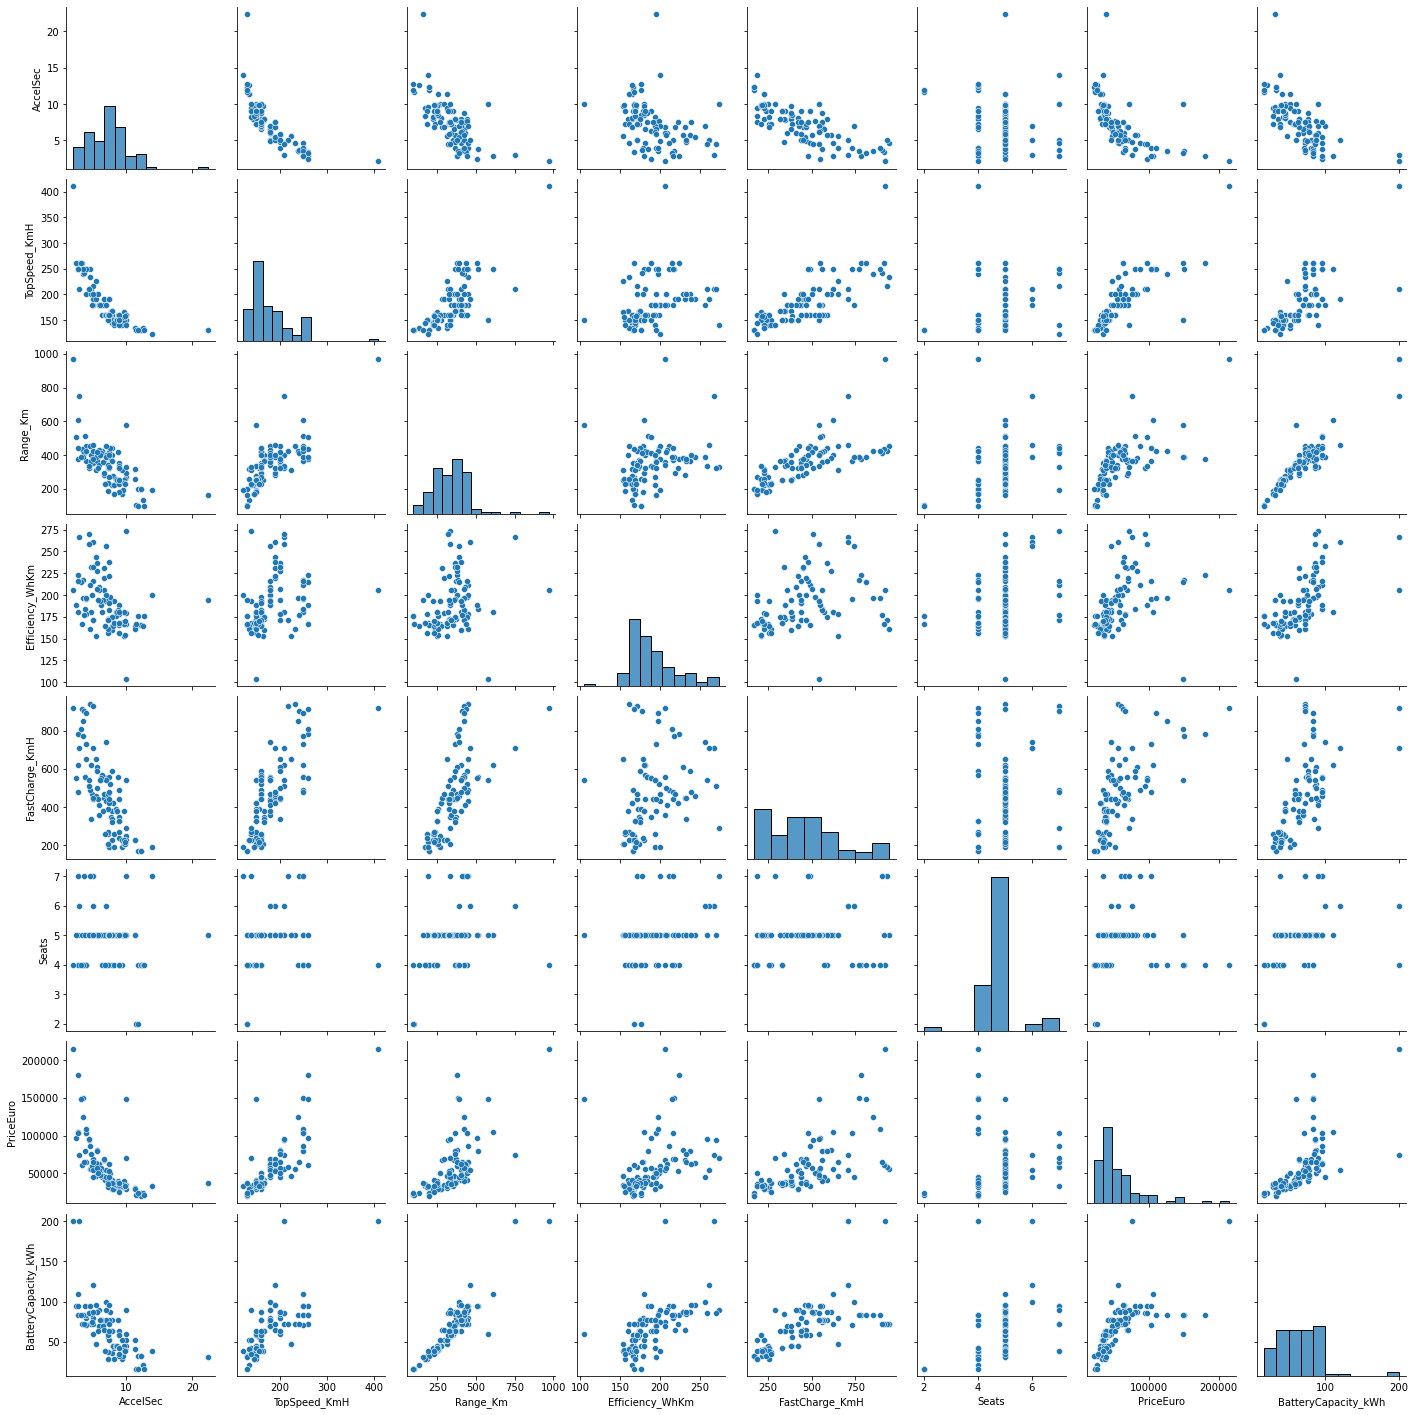

In [19]:
sns.pairplot(data=EV)

- Some interesting relationships are observable with relation to the Price. 
- Price vs. Efficiency, Range, Top Speed, Acceleration.
- Price vs. Acceleration is particularly interesting as you would expect a direct relationship between the two.
They could be affected by the size and number of seats(or bodyStyle). 

<Figure size 720x720 with 0 Axes>

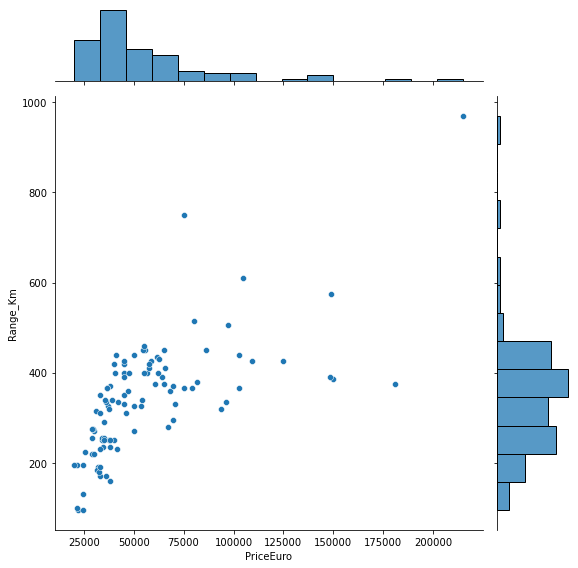

In [20]:
plt.figure(figsize=(10,10))
sns.jointplot(data=EV, x='PriceEuro', y='Range_Km', kind="scatter", height=8)

<AxesSubplot:xlabel='PriceEuro', ylabel='Range_Km'>

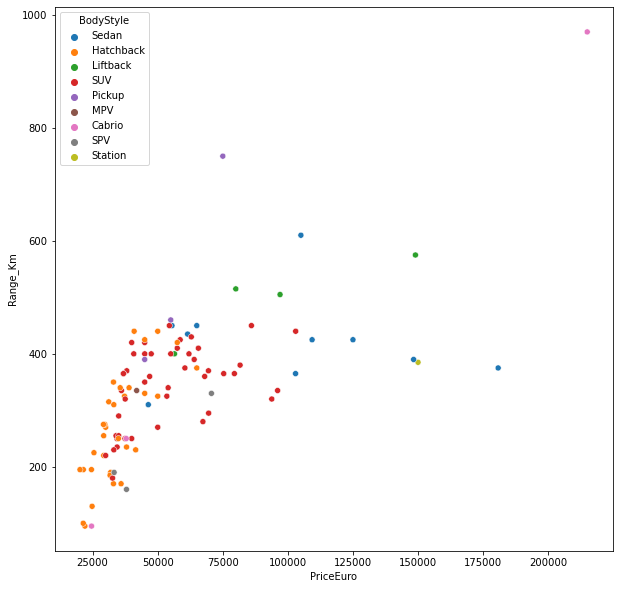

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=EV, x='PriceEuro', y='Range_Km', hue='BodyStyle')

**Use Plotly and Cufflinks to create interactive plots**

In [22]:
import plotly
import cufflinks as cf
cf.go_offline()

In [23]:
EV.iplot(x='PriceEuro', y='Range_Km', categories='BodyStyle',
        xTitle='PriceEuro', yTitle='Range_Km')

C:\Users\ZFATMI\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\ZFATMI\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



**KDE plot**

Notice that there are only 3 Cabrio style cars with one being super expensive and with a very high range, this tends to skew the kde distribution results.
For the sake of better visualisation in the following KDE plot we will temporarily remove the Cabrio body style from the KDE plot dataset.

C:\Users\ZFATMI\Anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\ZFATMI\Anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.



<AxesSubplot:xlabel='PriceEuro', ylabel='Range_Km'>

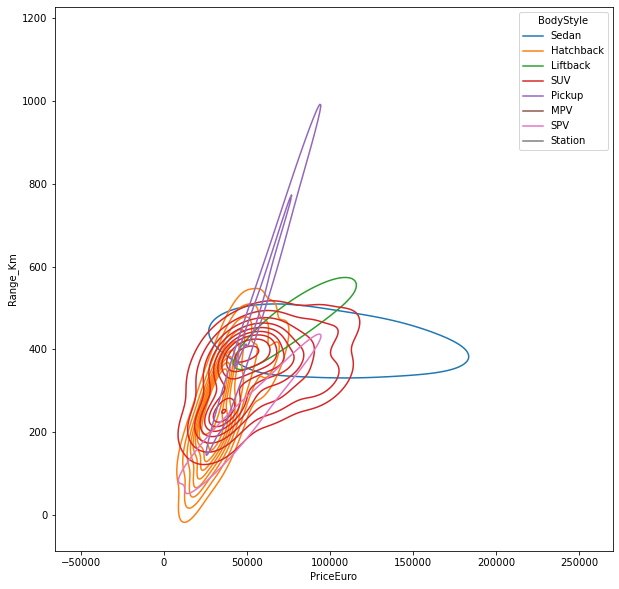

In [24]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=EV[EV['BodyStyle'] != 'Cabrio'],x='PriceEuro', 
            y='Range_Km', hue='BodyStyle')

For EVs of all BodyStyles (except Sedans), the price has a positive correlation with range.

Sedans price variation might be related to other variables. 

**Let's try and identify these correlations** 

In [25]:
EV_Sedan = EV[EV['BodyStyle']=='Sedan']
EV_Sedan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 79
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                10 non-null     object 
 1   Model                10 non-null     object 
 2   AccelSec             10 non-null     float64
 3   TopSpeed_KmH         10 non-null     int64  
 4   Range_Km             10 non-null     int64  
 5   Efficiency_WhKm      10 non-null     int64  
 6   FastCharge_KmH       10 non-null     float64
 7   RapidCharge          10 non-null     object 
 8   PowerTrain           10 non-null     object 
 9   PlugType             10 non-null     object 
 10  BodyStyle            10 non-null     object 
 11  Segment              10 non-null     object 
 12  Seats                10 non-null     int64  
 13  PriceEuro            10 non-null     int64  
 14  FullName             10 non-null     object 
 15  BatteryCapacity_kWh  10 non-null     float

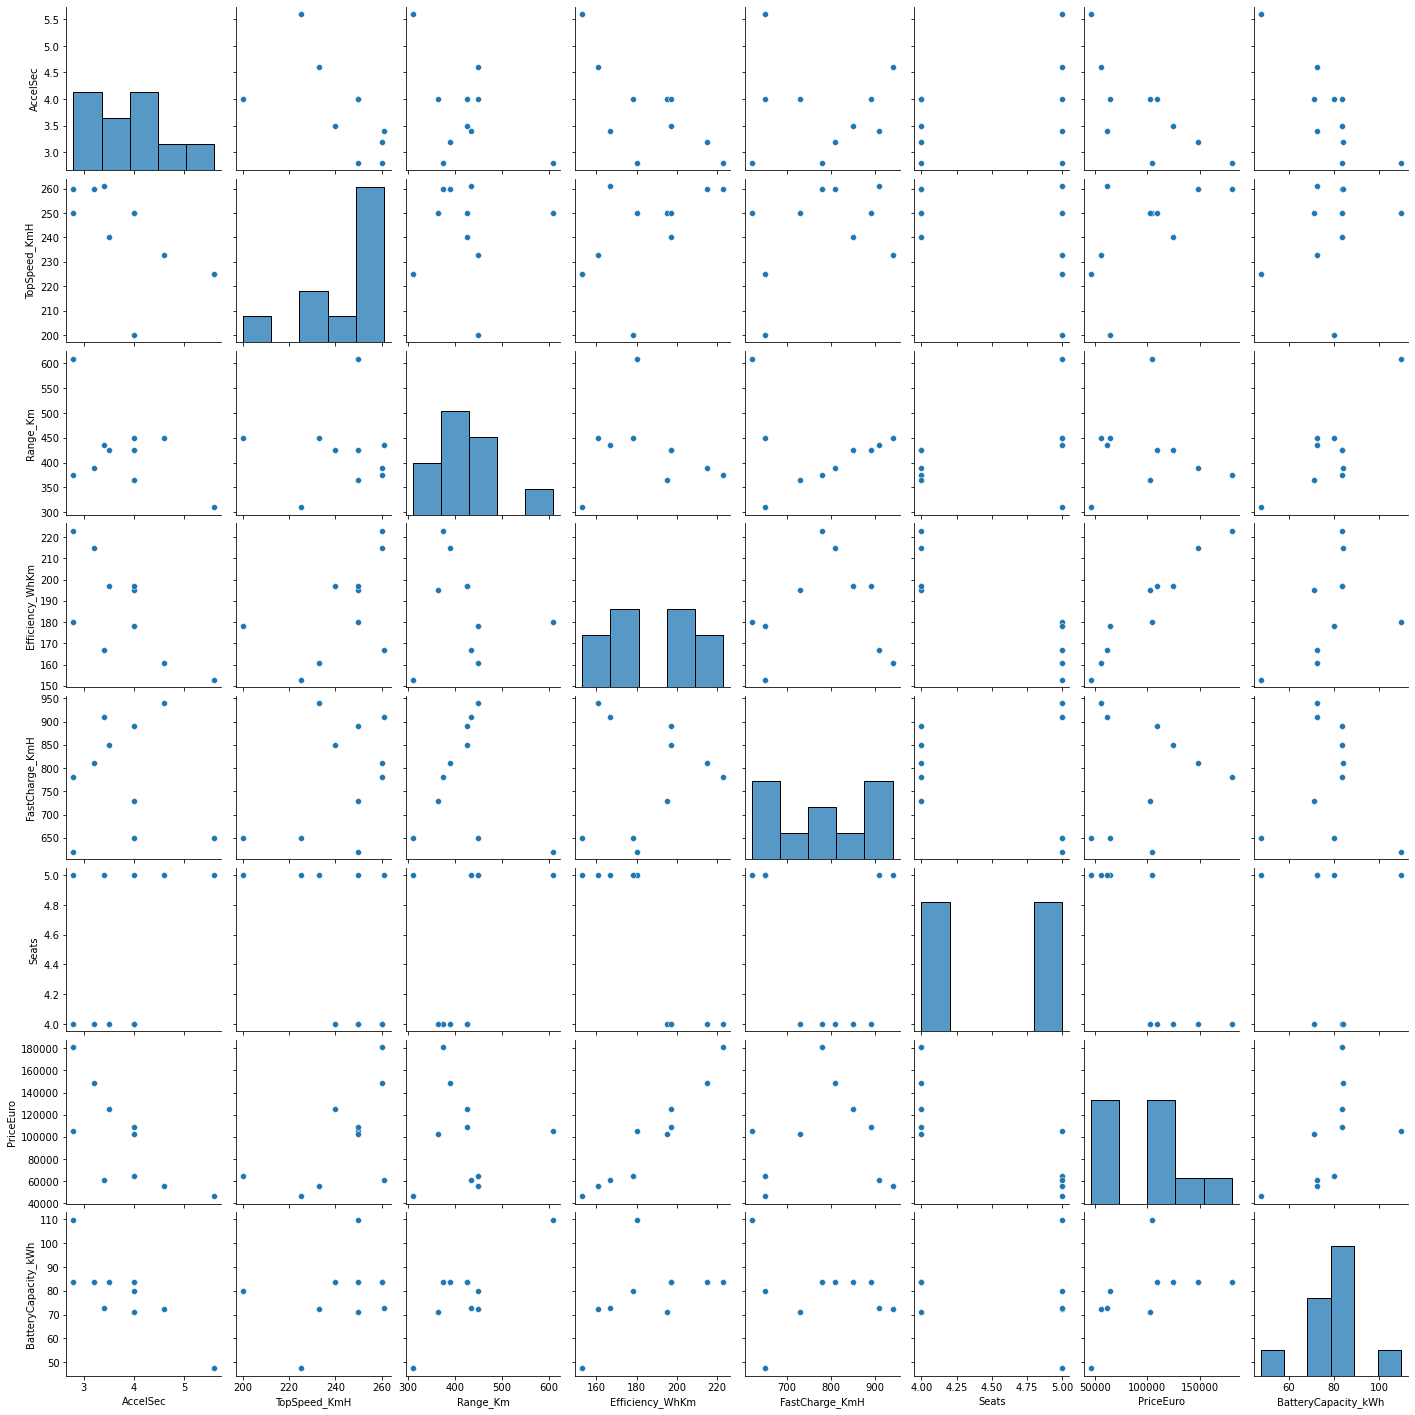

In [26]:
sns.pairplot(data = EV_Sedan)

<AxesSubplot:>

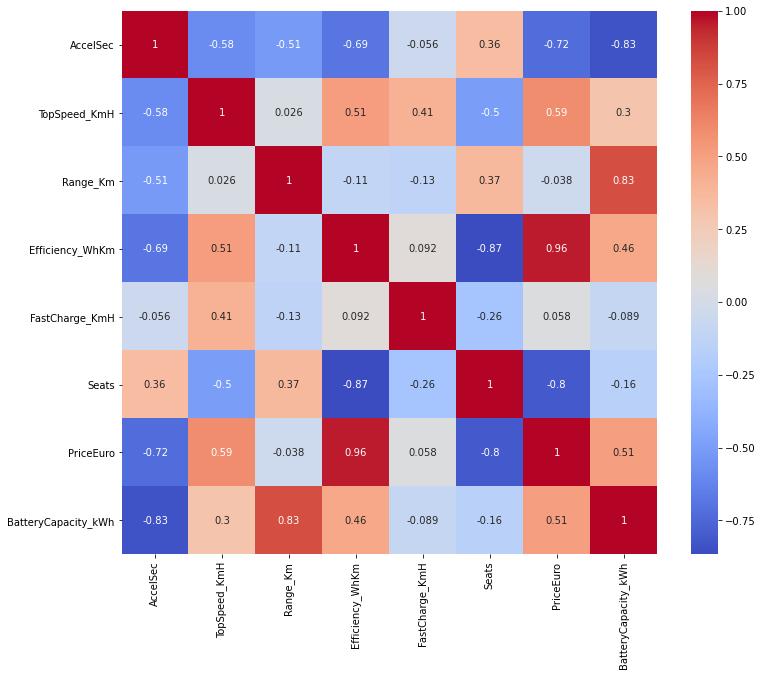

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(EV_Sedan.corr(),cmap='coolwarm',annot=True)

We can see a strong linear correlation between the PriceEuro with Efficiency_WhKm on the Pairplot.

This high correlation is also seen on the heatmap showing the 'Pearson' correlation between features.

**Plot lmplot for PriceEuro vs. Efficiency_WhKm**

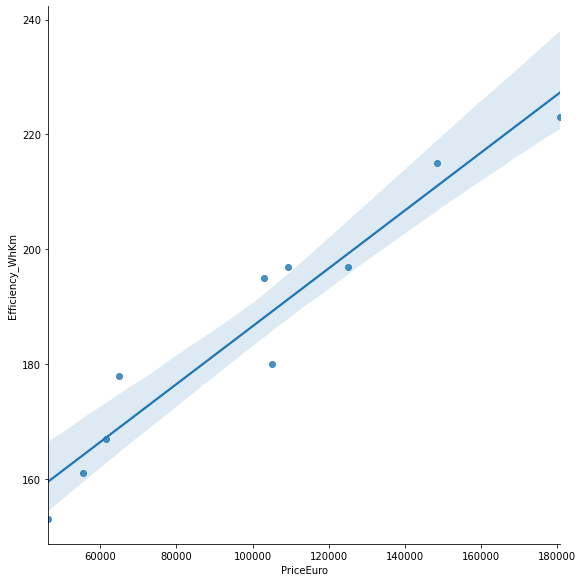

In [28]:
sns.lmplot(data=EV_Sedan,x='PriceEuro',y='Efficiency_WhKm', height=8)

C:\Users\ZFATMI\Anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\ZFATMI\Anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\ZFATMI\Anaconda3\lib\site-packages\seaborn\distributions.py:1182: UserWarning:

No contour levels were found within the data range.



<AxesSubplot:xlabel='Efficiency_WhKm', ylabel='Range_Km'>

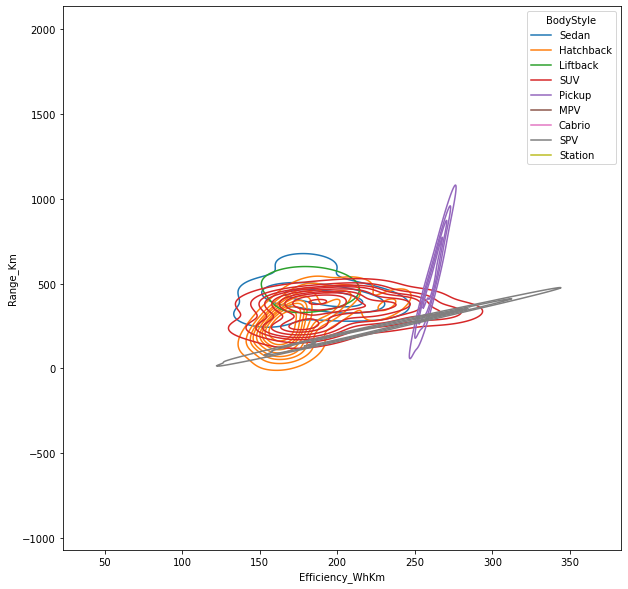

In [29]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=EV,x='Efficiency_WhKm', 
            y='Range_Km', hue='BodyStyle')

In [30]:
EV.sort_values(by = 'BatteryCapacity_kWh',ascending=False).head(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,FullName,BatteryCapacity_kWh
33,Tesla,Cybertruck Tri Motor,3.0,210,750,267,710.0,Yes,AWD,Type 2 CCS,Pickup,N,6,75000,Tesla-Cybertruck Tri Motor,200.25
51,Tesla,Roadster,2.1,410,970,206,920.0,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000,Tesla-Roadster,199.82
67,Tesla,Cybertruck Dual Motor,5.0,190,460,261,710.0,Yes,AWD,Type 2 CCS,Pickup,N,6,55000,Tesla-Cybertruck Dual Motor,120.06
5,Lucid,Air,2.8,250,610,180,620.0,Yes,AWD,Type 2 CCS,Sedan,F,5,105000,Lucid-Air,109.80
86,Tesla,Cybertruck Single Motor,7.0,180,390,256,740.0,Yes,RWD,Type 2 CCS,Pickup,N,6,45000,Tesla-Cybertruck Single Motor,99.84


**What vehicles models and brands are the most energy efficient?**

In [31]:
EV_brand=EV.groupby(by='Brand').mean()
EV_brand.sort_values(by='Efficiency_WhKm')      

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,BatteryCapacity_kWh
Brand,,,,,,,,
Lightyear,10.000000,150.000000,575.000000,104.000000,540.000000,5.000000,149000.000000,59.800000
Hyundai,9.166667,162.333333,301.666667,155.666667,266.666667,5.000000,36408.333333,47.173333
Sono,9.000000,140.000000,225.000000,156.000000,270.000000,5.000000,25500.000000,35.100000
Mini,7.300000,150.000000,185.000000,156.000000,260.000000,4.000000,31681.000000,28.860000
SEAT,12.300000,130.000000,195.000000,166.000000,170.000000,4.000000,20129.000000,32.370000
Fiat,9.000000,150.000000,250.000000,168.000000,330.000000,4.000000,36400.000000,42.000000
Honda,8.900000,145.000000,170.000000,168.000000,190.000000,4.000000,34459.000000,28.560000
Renault,13.460000,135.000000,234.000000,170.400000,230.000000,4.800000,31268.200000,39.494000
Volkswagen,8.812500,155.000000,318.125000,170.875000,402.500000,4.750000,34602.375000,54.702500
